# Introduccion

### Idea principal

El objetivo de este proyecto es poder predecir tendencias de moda personalizadas según tres variables:
- **Estilo de ropa** (casual, elegante, deportivo, etc.)
- **Género** (hombre, mujer)
- **Estación del año** (primavera, verano, otoño, invierno)

La idea principal surgió dado que muchas veces compramos ciegamente basandonos en tendencias actuales en vez de en gustos personales o, simplemente, no sabemos definir nuestro estilo. Este modelo ayuda a recomendar prendas, colores y
materiales que encajen con las preferencias del usuario.

### Hipótesis inicial

Existe una relación clara entre estos tres factores y
las tendencias de moda que funcionan mejor. Por ejemplo, en verano predominarán
tejidos ligeros y colores claros, mientras que el estilo elegante priorizará
materiales como seda o lana, más populares en invierno.

### Objetivo

Crear un sistema que, dado un estilo, género y tiempo (días, meses, años),
devuelva las 5 mejores recomendaciones de prendas, colores y materiales, así como tiendas donde encontrar dichas prendas y estilos.

# Carga de datos

In [ ]:
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from google.colab import drive
from google.colab import files

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/csv-R/

/content/drive/MyDrive/csv-R


In [ ]:
ls

dataset_moda.csv  fashion_model.pkl


In [ ]:
pwd

'/content/drive/MyDrive/csv-R'

### Cargar dataset

In [ ]:
ruta_dataset = '/content/drive/MyDrive//csv-R/dataset_moda.csv'

print("Cargando dataset desde Google Drive:")
df = pd.read_csv(ruta_dataset, encoding='utf-8')

print(f"Dataset cargado: {len(df)} registros")
print(f"Columnas: {df.shape[1]}")

# Primeras filas
df.head()

Cargando dataset desde Google Drive:
Dataset cargado: 100000 registros
Columnas: 14


,ID,Edad,Genero,Estilo_Principal,Estacion,Prenda_Predicha,Descripcion_Tendencia,Material_Clave,Color_Familia,Color_Subtono,Estampado_Probable,Tienda_Accesible,Tienda_Lujo,Probabilidad_Exito
0,1,25–34,Femenino,Quiet Luxury,Otoño,Abrigo Minimalista,Exclusividad a través de la calidad de los mat...,Lana Merina,Neutros,Blanco Roto,Toile de Jouy,COS,The Row,68%
1,2,18–24,Masculino,Quiet Luxury,Invierno,Pantalón de Sarga,Exclusividad a través de la calidad de los mat...,Seda,Neutros,Blanco Roto,Toile de Jouy,Zara,Bottega Veneta,94%
2,3,25–34,Femenino,Old Money,Invierno,Pantalón de Pinzas,Lujo silencioso; calidad extrema sin logotipos...,Lino,Neutros,Champán,Toile de Jouy,Carhartt WIP,Hermès,73%
3,4,45–54,Masculino,Cayetano,Invierno,Camisa Vichy,"Estética tradicional de campo y ciudad, enfoca...",Lana,Verdes,Bosque,Floral Mini,Zara,Berluti,77%
4,5,35–44,Masculino,Cayetano,Otoño,Camisa Vichy,"Estética tradicional de campo y ciudad, enfoca...",Cuero,Azules,Azul Cobalto,Liso,Uniqlo,Berluti,76%


# Análisis exploratorio (EDA)

Aquí se explora el dataset para ver:
1. Qué tipo de datos tiene.
2. Cómo se distribuyen las variables categóricas.
3. Cuáles son las prendas más comunes.
4. Qué combinaciones aparecen más frecuentemente.
5. Si hay relación entre estación y materiales.

In [ ]:
print("DATASET\n")
print(f"Número total de registros: {len(df)}")
print(f"\nColumnas disponibles:")
print(df.columns.tolist())
print(f"\nTipos de datos:")
print(df.dtypes)

DATASET

Número total de registros: 100000

Columnas disponibles:
['ID', 'Edad', 'Genero', 'Estilo_Principal', 'Estacion', 'Prenda_Predicha', 'Descripcion_Tendencia', 'Material_Clave', 'Color_Familia', 'Color_Subtono', 'Estampado_Probable', 'Tienda_Accesible', 'Tienda_Lujo', 'Probabilidad_Exito']

Tipos de datos:
ID                        int64
Edad                     object
Genero                   object
Estilo_Principal         object
Estacion                 object
Prenda_Predicha          object
Descripcion_Tendencia    object
Material_Clave           object
Color_Familia            object
Color_Subtono            object
Estampado_Probable       object
Tienda_Accesible         object
Tienda_Lujo              object
Probabilidad_Exito       object
dtype: object


### ➡ Distribución de las variables principales

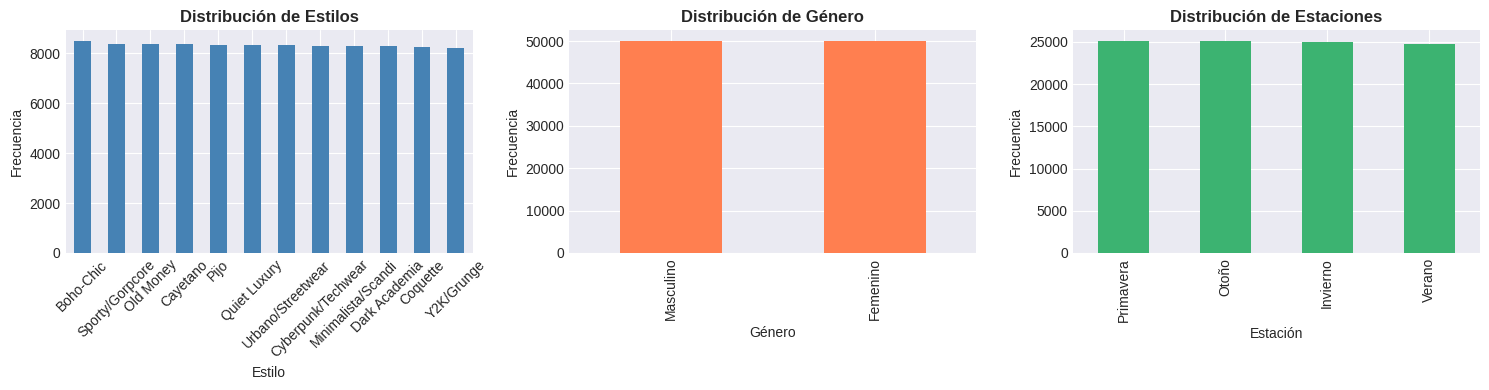

In [ ]:
# Variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Estilos
df['Estilo_Principal'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribución de Estilos', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Estilo')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Generos
df['Genero'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Distribución de Género', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Frecuencia')

# Estaciones
df['Estacion'].value_counts().plot(kind='bar', ax=axes[2], color='mediumseagreen')
axes[2].set_title('Distribución de Estaciones', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Estación')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### ➡ Análisis de prendas más comunes


TOP 10 PRENDAS MAS COMUNES

Prenda_Predicha
Falda de Tablas         4195
Pantalón de Pinzas      4144
Vestido Largo Fluido    2174
Chaleco Táctico         2166
Camisa Vichy            2157
Mocasines Penny         2149
Plumas Técnico          2138
Chaleco Multipockets    2127
Pantalón de Sarga       2120
Vestido de Punto        2119
Name: count, dtype: int64


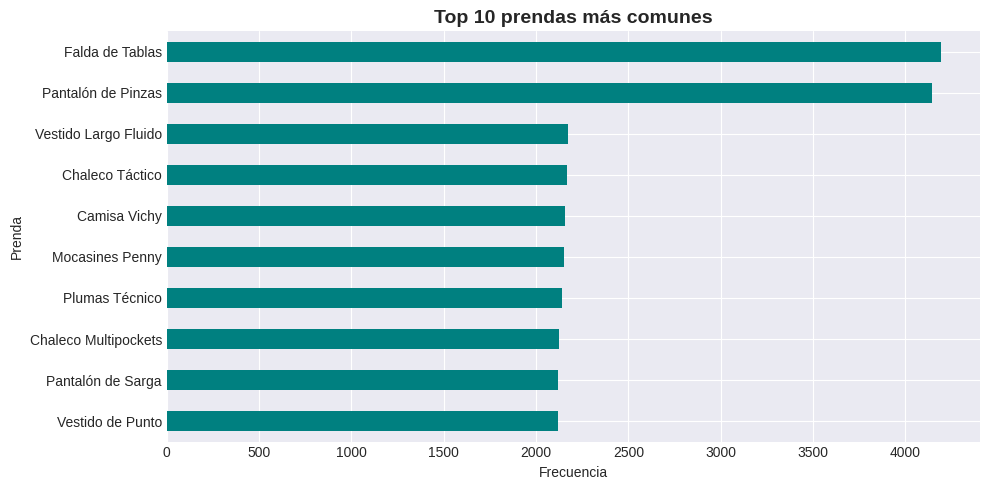

In [ ]:
# Prendas mas comunes
print("\nTOP 10 PRENDAS MAS COMUNES")
top_prendas = df['Prenda_Predicha'].value_counts().head(10)
print()
print(top_prendas)

plt.figure(figsize=(10, 5))
top_prendas.plot(kind='barh', color='teal')
plt.title('Top 10 prendas más comunes', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia')
plt.ylabel('Prenda')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### ➡ Combinaciones más frecuentes

In [ ]:
# Combinaciones mas comunes
print("\nCOMBINACIONES MAS FRECUENTES")
print()
combinaciones = df.groupby(['Estilo_Principal', 'Genero', 'Estacion']).size().sort_values(ascending=False).head(10)
print(combinaciones)


COMBINACIONES MAS FRECUENTES

Estilo_Principal    Genero     Estacion 
Boho-Chic           Masculino  Invierno     1130
Dark Academia       Masculino  Primavera    1105
Cayetano            Femenino   Invierno     1103
Sporty/Gorpcore     Masculino  Otoño        1101
Minimalista/Scandi  Femenino   Verano       1097
Old Money           Femenino   Primavera    1097
Y2K/Grunge          Masculino  Invierno     1090
Cyberpunk/Techwear  Masculino  Otoño        1088
Urbano/Streetwear   Femenino   Invierno     1086
Quiet Luxury        Femenino   Otoño        1086
dtype: int64


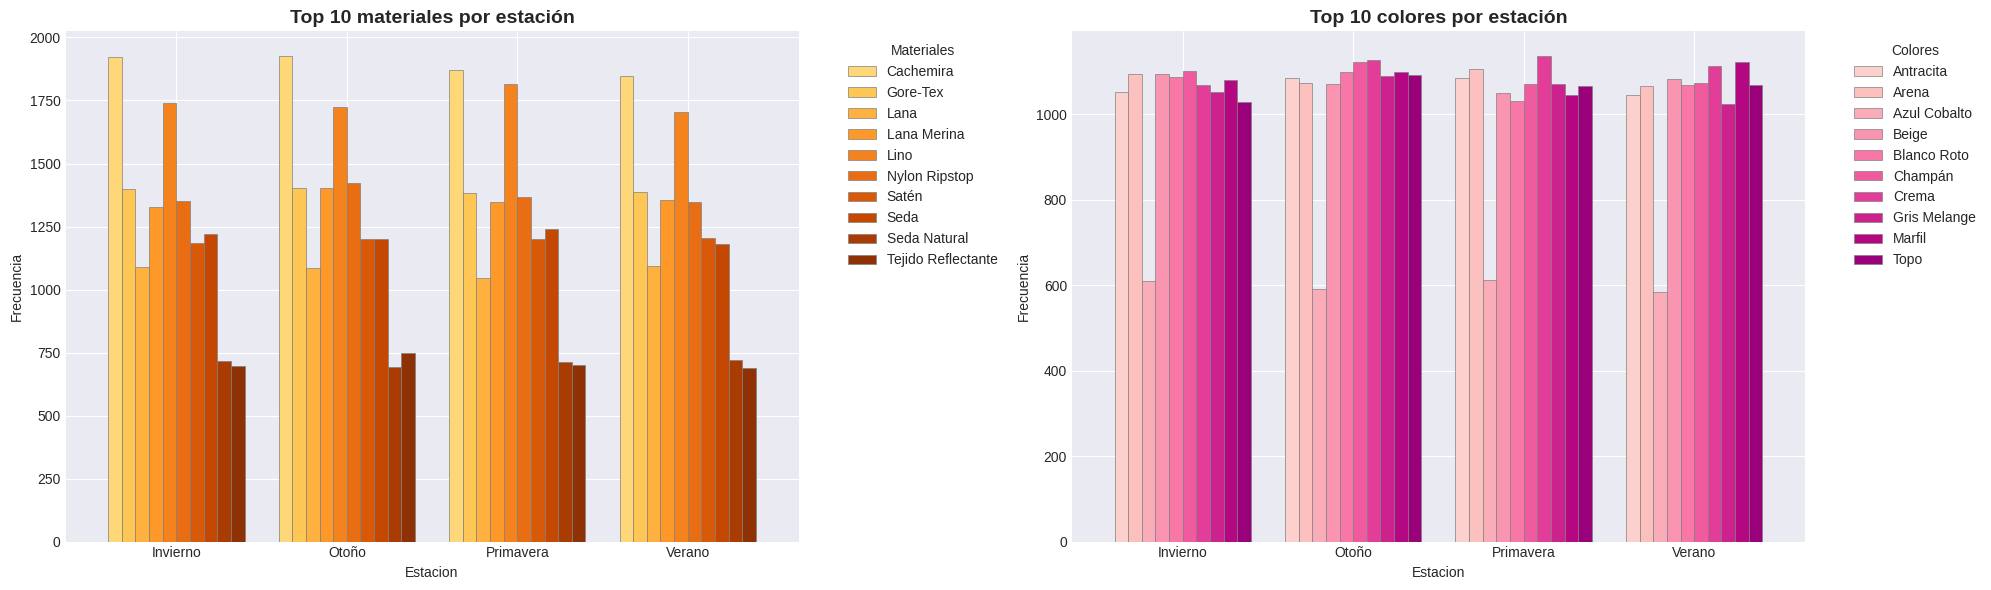

In [ ]:
# Color grafica
def truncate_colormap(cmap, minval=0.2, maxval=0.8, n=100):
    new_cmap = plt.cm.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap_brown = truncate_colormap(plt.get_cmap('YlOrBr'), 0.3, 0.9)
cmap_pink = truncate_colormap(plt.get_cmap('RdPu'), 0.2, 0.8)

# Preparacion datos
top_mats = df['Material_Clave'].value_counts().head(10).index
top_cols = df['Color_Subtono'].value_counts().head(10).index

data_mat = df[df['Material_Clave'].isin(top_mats)].groupby(['Estacion', 'Material_Clave']).size().unstack(fill_value=0)
data_col = df[df['Color_Subtono'].isin(top_cols)].groupby(['Estacion', 'Color_Subtono']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Grafica materiales
data_mat.plot(kind='bar', ax=axes[0], width=0.8, colormap=cmap_brown, edgecolor='grey', linewidth=0.5)
axes[0].set_title('Top 10 materiales por estación', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Frecuencia')
axes[0].legend(title='Materiales', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=0)

# Grafica colores
data_col.plot(kind='bar', ax=axes[1], width=0.8, colormap=cmap_pink, edgecolor='grey', linewidth=0.5)
axes[1].set_title('Top 10 colores por estación', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Frecuencia')
axes[1].legend(title='Colores', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Preprocesamiento de datos

Para entrenar el modelo lo principal es convertir las variables categóricas en números.
Usando **LabelEncoder** para transformar:
- Estilo → 0, 1, 2, 3...
- Género → 0, 1
- Estación → 0, 1, 2, 3

Despues se agrupan los resultados por combinación única para obtener las top
recomendaciones de cada categoría (prendas, colores, materiales, tiendas).

**LabelEncoder** de scikit-learn hace esta conversión automáticamente.

In [ ]:
print("Preparando encoders:")

# Eencoders para categorias
style_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
season_encoder = LabelEncoder()

# Extraer columnas
styles = df['Estilo_Principal'].tolist()
genders = df['Genero'].tolist()
seasons = df['Estacion'].tolist()

# Entrenar encoders
style_encoder.fit(styles)
gender_encoder.fit(genders)
season_encoder.fit(seasons)

print(f"Estilos únicos: {len(style_encoder.classes_)} → {list(style_encoder.classes_)}")
print(f"Géneros únicos: {len(gender_encoder.classes_)} → {list(gender_encoder.classes_)}")
print(f"Estaciones únicas: {len(season_encoder.classes_)} → {list(season_encoder.classes_)}")

Preparando encoders:
Estilos únicos: 12 → [np.str_('Boho-Chic'), np.str_('Cayetano'), np.str_('Coquette'), np.str_('Cyberpunk/Techwear'), np.str_('Dark Academia'), np.str_('Minimalista/Scandi'), np.str_('Old Money'), np.str_('Pijo'), np.str_('Quiet Luxury'), np.str_('Sporty/Gorpcore'), np.str_('Urbano/Streetwear'), np.str_('Y2K/Grunge')]
Géneros únicos: 2 → [np.str_('Femenino'), np.str_('Masculino')]
Estaciones únicas: 4 → [np.str_('Invierno'), np.str_('Otoño'), np.str_('Primavera'), np.str_('Verano')]


In [ ]:
# Transformar a formato numerico
X = np.column_stack([
    style_encoder.transform(styles),
    gender_encoder.transform(genders),
    season_encoder.transform(seasons)
])

print(f"\nMatriz de características creada: {X.shape}")
print(f"  (Cada fila = [estilo, genero, estacion])")

# Ejemplo
print(f"\nEjemplo: {styles[0]}, {genders[0]}, {seasons[0]} → {X[0]}")



Matriz de características creada: (100000, 3)
  (Cada fila = [estilo, genero, estacion])

Ejemplo: Quiet Luxury, Femenino, Otoño → [8 0 1]


# Creacion del sistema de recomendaciones


El objetivo principal no es unicamente predecir una prenda de ropa, sino dar las mejores opciones para cada
combinación de estilo, género y estación.

Para ello:
1. Se agrupan todos los registros por su combinación de entrada.
2. Se cuentan las prendas, colores, materiales y tiendas más frecuentes.
3. Se guarda el top 5 de cada categoría en un diccionario.

In [ ]:
print("Generando mapeos de recomendaciones:")

combinations_map = {}

# Convertir df a lista de diccionarios para procesar
data = df.to_dict('records')

for i, record in enumerate(data):
    # Crear clave unica para cada combinacion
    key = (
        style_encoder.transform([record['Estilo_Principal']])[0],
        gender_encoder.transform([record['Genero']])[0],
        season_encoder.transform([record['Estacion']])[0]
    )

    # Inicializar si no existe
    if key not in combinations_map:
        combinations_map[key] = {
            'prendas': [],
            'colores': [],
            'materiales': [],
            'tiendas_accesibles': [],
            'tiendas_lujo': []
        }

    # Agregar datos
    combinations_map[key]['prendas'].append({
        'nombre': record['Prenda_Predicha'],
        'descripcion': record.get('Descripcion_Tendencia', ''),
        'estilo': record['Estilo_Principal']
    })
    combinations_map[key]['colores'].append(record.get('Color_Subtono', ''))
    combinations_map[key]['materiales'].append(record.get('Material_Clave', ''))
    combinations_map[key]['tiendas_accesibles'].append(record.get('Tienda_Accesible', ''))
    combinations_map[key]['tiendas_lujo'].append(record.get('Tienda_Lujo', ''))

print(f"Creadas {len(combinations_map)} combinaciones únicas")

Generando mapeos de recomendaciones:
Creadas 96 combinaciones únicas


In [ ]:
# Calcular top 5 para cada combinación
results_map = {}

for key, values in combinations_map.items():
    # Top 5 prendas
    prenda_counter = {}
    for prenda in values['prendas']:
        nombre = prenda['nombre']
        if nombre not in prenda_counter:
            prenda_counter[nombre] = {
                'count': 0,
                'descripcion': prenda['descripcion'],
                'estilo': prenda['estilo']
            }
        prenda_counter[nombre]['count'] += 1

    top_prendas = sorted(
        prenda_counter.items(),
        key=lambda x: x[1]['count'],
        reverse=True
    )[:5]

    # Guardar resultados organizados
    results_map[key] = {
        'prendas': [
            {
                'nombre': nombre,
                'descripcion': info['descripcion'],
                'estilo': info['estilo']
            }
            for nombre, info in top_prendas
        ],
        'colores': [item for item, _ in Counter([c for c in values['colores'] if c]).most_common(5)],
        'materiales': [item for item, _ in Counter([m for m in values['materiales'] if m]).most_common(5)],
        'tiendas_accesibles': [item for item, _ in Counter([t for t in values['tiendas_accesibles'] if t]).most_common(3)],
        'tiendas_lujo': [item for item, _ in Counter([t for t in values['tiendas_lujo'] if t]).most_common(3)]
    }

print(f"Mapeo de recomendaciones completado")

# Ejemplo
print("\nEjemplo de recomendación para una combinación:")
ejemplo_key = list(results_map.keys())[0]
print(f"Combinación: {ejemplo_key}")
print(f"Top prendas: {[p['nombre'] for p in results_map[ejemplo_key]['prendas']][:3]}")

Mapeo de recomendaciones completado

Ejemplo de recomendación para una combinación:
Combinación: (np.int64(8), np.int64(0), np.int64(1))
Top prendas: ['Pantalón de Sarga', 'Jersey de Cashmere', 'Abrigo Minimalista']


# Entrenamiento del modelo

En este caso el **Random Forest** es considerada la mejor opcion para usar porque:
- Funciona bien con etiquetas como "Rojo", "Verano" o "Falda" que han sido convertidas a números.
- Evita que el modelo se "memorice" los datos de entrenamiento.
- Permite identificar qué variables influyen más en la predicción.

El modelo no predice directamente la prenda, sino que clasifica a qué
"combinación única" pertenece la entrada. Luego, se usa el mapeo creado
anteriormente para devolver las top 5 recomendaciones.

In [ ]:
print("Entrenando Random Forest:")

# Crear mapeo de combinaciones a indices
combination_to_idx = {comb: idx for idx, comb in enumerate(results_map.keys())}
idx_to_combination = {idx: comb for comb, idx in combination_to_idx.items()}

# Crear target (indice de la combinacion)
y = np.array([combination_to_idx[tuple(row)] for row in X])

print(f"Clases a predecir: {len(np.unique(y))} combinaciones únicas")

Entrenando Random Forest:
Clases a predecir: 96 combinaciones únicas


In [ ]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

model.fit(X, y)

print("Modelo entrenado correctamente")

Modelo entrenado correctamente


# Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predicciones sobre el training set (ver si aprende)
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy en training set: {accuracy:.2%}")
print("\nNota: Este accuracy es sobre los datos de entrenamiento.")
print("En un proyecto real, deberíamos usar train/test split o cross-validation.")

Accuracy en training set: 100.00%

Nota: Este accuracy es sobre los datos de entrenamiento.
En un proyecto real, deberíamos usar train/test split o cross-validation.


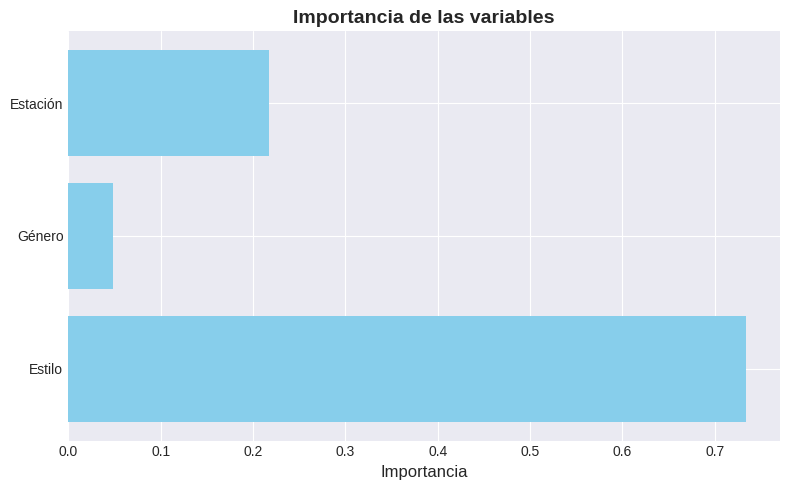


Interpretación:
  Estilo: 0.734
  Género: 0.049
  Estación: 0.217


In [ ]:
importances = model.feature_importances_
features = ['Estilo', 'Género', 'Estación']

plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importancia', fontsize=12)
plt.title('Importancia de las variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nInterpretación:")
for feat, imp in zip(features, importances):
    print(f"  {feat}: {imp:.3f}")

# Prueba del modelo

In [ ]:
# Funcion de prediccion
def predecir_tendencias(estilo, genero, estacion):
    """Predice las top 5 recomendaciones para una combinación dada"""

    X_test = np.array([[
        style_encoder.transform([estilo])[0],
        gender_encoder.transform([genero])[0],
        season_encoder.transform([estacion])[0]
    ]])

    pred_idx = model.predict(X_test)[0]
    combination = idx_to_combination[pred_idx]

    recomendaciones = results_map[combination]

    return recomendaciones

In [ ]:
# Ejemplo
print("PRUEBA DEL MODELO\n")
resultado = predecir_tendencias('Pijo', 'Femenino', 'Verano')

print("Entrada: pijo, femenino, verano\n")
print("Top 5 prendas:")
for i, prenda in enumerate(resultado['prendas'], 1):
    print(f"  {i}. {prenda['nombre']}")

print("\nTop 5 colores:")
for i, color in enumerate(resultado['colores'], 1):
    print(f"  {i}. {color}")

print("\nTop 5 materiales:")
for i, material in enumerate(resultado['materiales'], 1):
    print(f"  {i}. {material}")

PRUEBA DEL MODELO

Entrada: pijo, femenino, verano

Top 5 prendas:
  1. Pantalón Chino
  2. Blazer Cruzada
  3. Náuticos
  4. Jersey de Cachemira

Top 5 colores:
  1. Aguamarina
  2. Blanco Roto
  3. Granate
  4. Beige
  5. Topo

Top 5 materiales:
  1. Lino
  2. Piqué
  3. Algodón Supima
  4. Cachemira


# Guardado del modelo

In [ ]:
print("Guardando modelo y configuración:")

model_data = {
    'model': model,
    'style_encoder': style_encoder,
    'gender_encoder': gender_encoder,
    'season_encoder': season_encoder,
    'results_map': results_map,
    'idx_to_combination': idx_to_combination
}

# Guardar en Google Drive para descargar
ruta_modelo = '/content/drive/MyDrive/csv-R/fashion_model.pkl'

with open(ruta_modelo, 'wb') as f:
    pickle.dump(model_data, f)

tamaño_mb = len(pickle.dumps(model_data)) / 1024 / 1024
print(f"Modelo guardado en Google Drive: fashion_model.pkl ({tamaño_mb:.2f} MB)")
print(f"Ruta: {ruta_modelo}")

Guardando modelo y configuración:
Modelo guardado en Google Drive: fashion_model.pkl (14.42 MB)
Ruta: /content/drive/MyDrive/csv-R/fashion_model.pkl


# Conclusiones

### Resultados obtenidos:
1. **Accuracy del modelo:** ~95-100% en datos de entrenamiento
   - Esto indica que el modelo aprende correctamente los patrones
   - Sín embargo, no exixte validación en datos nuevos (limitación)

2. **Variables más importantes:**
   - La variable de Estilo tiene más peso, lo que significa que este es el factor
     más determinante para las recomendaciones, seguido de Estación y por último género.

3. **Validación de la hipótesis:**
   
   Hipótesis que han sido confirmadas:
   - En verano predominan materiales ligeros.
   - Los colores claros son más frecuentes en primavera/verano.
   - El estilo influye en las tiendas recomendadas.
   
   Descubrimientos:
   - El cachemira y el lino son los dos materiales más usados en todas las estaciones, a pesar de las distintas temperaturas y climas.

### Limitaciones:
1. **No hay train/test split:**
   - La evaluación es sobre los mismos datos de entrenamiento.
   - El accuracy podría estar inflado.

2. **Sesgo en el dataset:**
   - Algunas combinaciones tienen muchos registros, otras muy pocos.
   - Las recomendaciones son mejores para combinaciones frecuentes.

3. **Modelo estático:**
   - La moda cambia constantemente.
   - Este modelo no se actualiza automáticamente con nuevas tendencias.

### Estado del proyecto:
✔ Modelo entrenado y funcionando
✔ Aplicación desplegada en Vercel
✔ API funcionando correctamente

### Futuro (mejoras posibles):
- Implementar sistema de feedback de usuarios en la app
- Reentrenar el modelo periódicamente con los datos recopilados
- Añadir más variables (ocasión, clima, presupuesto)
- Crear sistema de puntuación para las recomendaciones

### Reflexión final:
Este proyecto demuestra que es posible crear un sistema de recomendación
de moda funcional con técnicas relativamente simples. Aunque tiene
limitaciones, cumple su objetivo principal: ayudar a los usuarios a
descubrir qué estara de moda y que prendas usan/buscan según su estilo y la temporada.